**STEP 1**: Import all necessary libraries

In [35]:
!pip install yfinance pandas numpy matplotlib seaborn

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**STEP 2**: The creation of a clear interface for the change of ticker, start date and end dates. I never miss this in my codes. This is to ease accessibility. Here, a pipeline to the Yahoo Finance API is created to collect the data based on the ticker, start date and end date

In [36]:
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2024-11-25"

data = yf.download(ticker, start_date, end_date)
print(data)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2020-01-02 00:00:00+00:00   72.796021   75.087502   75.150002   73.797501   
2020-01-03 00:00:00+00:00   72.088287   74.357498   75.144997   74.125000   
2020-01-06 00:00:00+00:00   72.662704   74.949997   74.989998   73.187500   
2020-01-07 00:00:00+00:00   72.320976   74.597504   75.224998   74.370003   
2020-01-08 00:00:00+00:00   73.484352   75.797501   76.110001   74.290001   
...                               ...         ...         ...         ...   
2024-11-18 00:00:00+00:00  228.020004  228.020004  229.740005  225.169998   
2024-11-19 00:00:00+00:00  228.279999  228.279999  230.160004  226.660004   
2024-11-20 00:00:00+00:00  229.000000  229.000000  229.929993  225.889999   
2024-11-21 00:00:00+00:00  228.520004  228.520004  230.160004  225.710007   

**STEP 3**: Dropping the columns that are not needed for this project. The necessary columns are the CLOSE column and DATE column

In [37]:
data = data.drop(columns=['Adj Close', 'Open', 'High', 'Volume', 'Low'])
print(data)

Price                           Close
Ticker                           AAPL
Date                                 
2020-01-02 00:00:00+00:00   75.087502
2020-01-03 00:00:00+00:00   74.357498
2020-01-06 00:00:00+00:00   74.949997
2020-01-07 00:00:00+00:00   74.597504
2020-01-08 00:00:00+00:00   75.797501
...                               ...
2024-11-18 00:00:00+00:00  228.020004
2024-11-19 00:00:00+00:00  228.279999
2024-11-20 00:00:00+00:00  229.000000
2024-11-21 00:00:00+00:00  228.520004
2024-11-22 00:00:00+00:00  229.869995

[1233 rows x 1 columns]


**STEP 4**: Conversion of the collected data into a dataframe. There are several reasons for this step. One being its importance in data preprocessing. Another being its importance in handling diverse data (float, integer, strings etc). It is a flexibe structure for this purpose. Also, it is also needed in handling missing data

In [38]:
df = pd.DataFrame(data)
print(df)

Price                           Close
Ticker                           AAPL
Date                                 
2020-01-02 00:00:00+00:00   75.087502
2020-01-03 00:00:00+00:00   74.357498
2020-01-06 00:00:00+00:00   74.949997
2020-01-07 00:00:00+00:00   74.597504
2020-01-08 00:00:00+00:00   75.797501
...                               ...
2024-11-18 00:00:00+00:00  228.020004
2024-11-19 00:00:00+00:00  228.279999
2024-11-20 00:00:00+00:00  229.000000
2024-11-21 00:00:00+00:00  228.520004
2024-11-22 00:00:00+00:00  229.869995

[1233 rows x 1 columns]


**STEP 5**: Computation of the end of the month returns and the percentage change between one EOM return and the subsequent EOM return

In [39]:
monthly_data = df['Close'].resample('ME').last()
monthly_returns = monthly_data.pct_change() * 100

result = pd.DataFrame({'Date': monthly_data.index, 'End-of-Month Returns': monthly_data.values.reshape(-1), 'Monthly Return Change (%)': monthly_returns.values.reshape(-1)})
print(result)

                        Date  End-of-Month Returns  Monthly Return Change (%)
0  2020-01-31 00:00:00+00:00             77.377502                        NaN
1  2020-02-29 00:00:00+00:00             68.339996                 -11.679759
2  2020-03-31 00:00:00+00:00             63.572498                  -6.976146
3  2020-04-30 00:00:00+00:00             73.449997                  15.537377
4  2020-05-31 00:00:00+00:00             79.485001                   8.216479
5  2020-06-30 00:00:00+00:00             91.199997                  14.738625
6  2020-07-31 00:00:00+00:00            106.260002                  16.513164
7  2020-08-31 00:00:00+00:00            129.039993                  21.437974
8  2020-09-30 00:00:00+00:00            115.809998                 -10.252632
9  2020-10-31 00:00:00+00:00            108.860001                  -6.001206
10 2020-11-30 00:00:00+00:00            119.050003                   9.360649
11 2020-12-31 00:00:00+00:00            132.690002              

**STEP 6**: Plotting of the chart

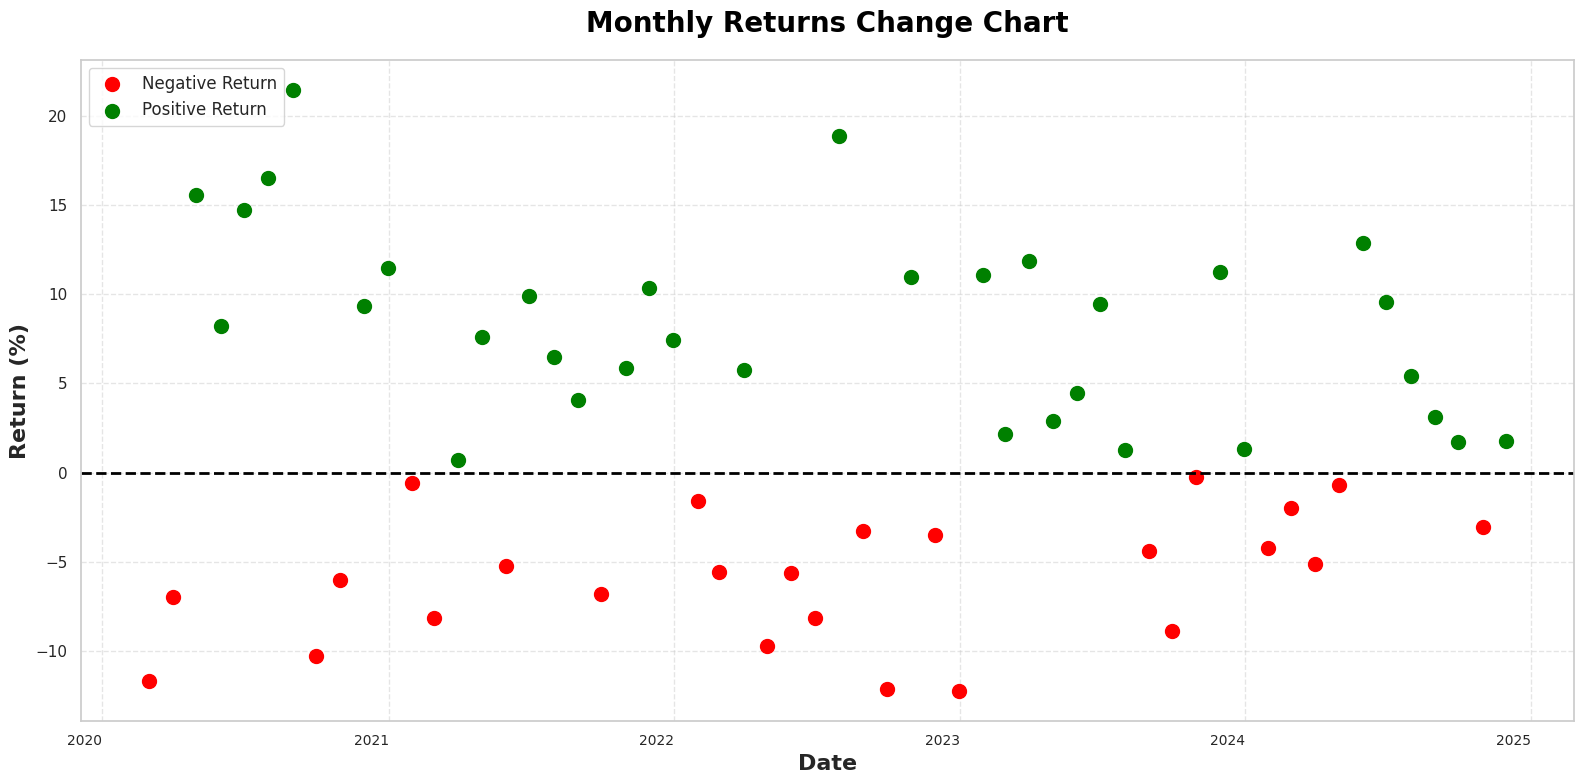

In [55]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 8))

positive_label_added = False
negative_label_added = False

for i in range(len(result)):
    if result['Monthly Return Change (%)'].iloc[i] >= 0:
        if not positive_label_added:
            plt.scatter(result['Date'].iloc[i], result['Monthly Return Change (%)'].iloc[i], color='green', s=100, label="Positive Return")
            positive_label_added = True
        else:
            plt.scatter(result['Date'].iloc[i], result['Monthly Return Change (%)'].iloc[i], color='green', s=100)
    else:
        if not negative_label_added:
            plt.scatter(result['Date'].iloc[i], result['Monthly Return Change (%)'].iloc[i], color='red', s=100, label="Negative Return")
            negative_label_added = True
        else:
            plt.scatter(result['Date'].iloc[i], result['Monthly Return Change (%)'].iloc[i], color='red', s=100)

plt.axhline(0, color='black', linewidth=2, linestyle='--')

plt.grid(True, linestyle='--', alpha=0.5)

plt.title("Monthly Returns Change Chart", fontsize=20, fontweight='bold', color='black', pad=20)
plt.xlabel("Date", fontsize=16, fontweight='bold')
plt.ylabel("Return (%)", fontsize=16, fontweight='bold')

plt.xticks(rotation=0, ha='right', fontsize=10)

plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()

plt.show()